# 📇Classification the performance of investment using Machine Learning

In this project, we're going to perform the classification the performance with the goal is to classify whether investments are perform well or not? 

## Problem Definition

For this dataset, the problem that we're going to solve is how well the investment based on the amount of money it invests.

## Data

There are 3 datasets:

1. `common.csv` - the information about investing of each firm which are (stock price, value of debt and equity).
2. `checklist.csv` - the checklist based on form to check whether how well the investments are good split it into 5 sections:
    * Enviroment 
    * Risk
    * Management 
    * Communication
    * Result

## Evaluation

For this problem, we set `ANOVA` as an evaluation model for our project.


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
# Import the data to the project by using pandas

df_common = pd.read_csv("data/common.csv")
df_checklist = pd.read_csv("data/checklist.csv")

## Data Preparation


In [189]:
# Check basic info

df_common
# df_checklist

,Stock,Market value,assets value*T,value of debt*T,year,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,AFC,4.101684e+08,1408353.96,199947.44,2017.0,NaN,NaN,NaN
1,B52,1.153692e+09,992625.61,566742.01,2017.0,NaN,NaN,NaN
2,BTNC,2.760000e+08,808462.69,353649.35,2017.0,NaN,NaN,NaN
3,CPH,2.500000e+08,1472357.63,677002.92,2017.0,NaN,NaN,NaN
4,CPL,1.508038e+09,2066865.24,991851.80,2017.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# We're going to drop undesire columns.

df_common.drop(["Unnamed: 5","Unnamed: 6","Unnamed: 7"],axis=1,inplace=True)

In [191]:
# Drop the cell that we're not want it.
df_common.dropna(inplace=True)
df_common

,Stock,Market value,assets value*T,value of debt*T,year
0,AFC,4.101684e+08,1408353.96,199947.44,2017.0
1,B52,1.153692e+09,992625.61,566742.01,2017.0
2,BTNC,2.760000e+08,808462.69,353649.35,2017.0
3,CPH,2.500000e+08,1472357.63,677002.92,2017.0
4,CPL,1.508038e+09,2066865.24,991851.80,2017.0
...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,2019.0
110,OCC,7.800000e+08,1234249.55,241079.81,2019.0
111,S & J,3.748271e+09,4945872.87,1020823.71,2019.0
112,TNR,2.730000e+09,2009040.27,781727.15,2019.0


In [192]:
df_checklist

,Stock,enviroment,risk,management,communication,result follow-up,year
0,AFC,7,6,3,4,8,2017
1,B52,8,6,6,8,8,2017
2,BTNC,8,5,6,5,8,2017
3,CPH,7,0,1,3,8,2017
4,CPL,6,4,3,2,8,2017
...,...,...,...,...,...,...,...
109,JCT,7,3,6,6,8,2019
110,OCC,8,6,6,8,8,2019
111,S & J,7,3,6,8,8,2019
112,TNR,8,3,6,6,8,2019


In [193]:
# Check shape of df_common and df_checklist

df_common.shape, df_checklist.shape

((114, 5), (114, 7))

In [194]:
# Merge the 2 datas into one dataframe.

df = pd.merge(df_common, df_checklist)

In [195]:
# Drop year column
df.drop("year",axis=1,inplace=True)

In [196]:
df

,Stock,Market value,assets value*T,value of debt*T,enviroment,risk,management,communication,result follow-up
0,AFC,4.101684e+08,1408353.96,199947.44,7,6,3,4,8
1,B52,1.153692e+09,992625.61,566742.01,8,6,6,8,8
2,BTNC,2.760000e+08,808462.69,353649.35,8,5,6,5,8
3,CPH,2.500000e+08,1472357.63,677002.92,7,0,1,3,8
4,CPL,1.508038e+09,2066865.24,991851.80,6,4,3,2,8
...,...,...,...,...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,7,3,6,6,8
110,OCC,7.800000e+08,1234249.55,241079.81,8,6,6,8,8
111,S & J,3.748271e+09,4945872.87,1020823.71,7,3,6,8,8
112,TNR,2.730000e+09,2009040.27,781727.15,8,3,6,6,8


In [197]:
# Create label for training data

df["1"] = df["value of debt*T"]*1000 + df["Market value"] 
df["2"] = df["assets value*T"]*1000
df["tobinq"] = df["1"] / df["2"]

In [198]:
df

,Stock,Market value,assets value*T,value of debt*T,enviroment,risk,management,communication,result follow-up,1,2,tobinq
0,AFC,4.101684e+08,1408353.96,199947.44,7,6,3,4,8,6.101158e+08,1.408354e+09,0.433212
1,B52,1.153692e+09,992625.61,566742.01,8,6,6,8,8,1.720434e+09,9.926256e+08,1.733215
2,BTNC,2.760000e+08,808462.69,353649.35,8,5,6,5,8,6.296494e+08,8.084627e+08,0.778823
3,CPH,2.500000e+08,1472357.63,677002.92,7,0,1,3,8,9.270029e+08,1.472358e+09,0.629604
4,CPL,1.508038e+09,2066865.24,991851.80,6,4,3,2,8,2.499890e+09,2.066865e+09,1.209508
...,...,...,...,...,...,...,...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,7,3,6,6,8,1.316031e+09,1.363507e+09,0.965182
110,OCC,7.800000e+08,1234249.55,241079.81,8,6,6,8,8,1.021080e+09,1.234250e+09,0.827288
111,S & J,3.748271e+09,4945872.87,1020823.71,7,3,6,8,8,4.769094e+09,4.945873e+09,0.964257
112,TNR,2.730000e+09,2009040.27,781727.15,8,3,6,6,8,3.511727e+09,2.009040e+09,1.747963


In [199]:
df.drop(["1","2"],axis=1,inplace=True)

In [200]:
df

,Stock,Market value,assets value*T,value of debt*T,enviroment,risk,management,communication,result follow-up,tobinq
0,AFC,4.101684e+08,1408353.96,199947.44,7,6,3,4,8,0.433212
1,B52,1.153692e+09,992625.61,566742.01,8,6,6,8,8,1.733215
2,BTNC,2.760000e+08,808462.69,353649.35,8,5,6,5,8,0.778823
3,CPH,2.500000e+08,1472357.63,677002.92,7,0,1,3,8,0.629604
4,CPL,1.508038e+09,2066865.24,991851.80,6,4,3,2,8,1.209508
...,...,...,...,...,...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,7,3,6,6,8,0.965182
110,OCC,7.800000e+08,1234249.55,241079.81,8,6,6,8,8,0.827288
111,S & J,3.748271e+09,4945872.87,1020823.71,7,3,6,8,8,0.964257
112,TNR,2.730000e+09,2009040.27,781727.15,8,3,6,6,8,1.747963


Create a target column check from Tobin q features is Tobin q higher than 0.9, that's mean the firm has performed better in adding shareholders wealth.

In [201]:

df["target"] = df["tobinq"] > 0.9 

In [202]:
# Change feature type to int 
df["target"] = df["target"].astype(int)
df

,Stock,Market value,assets value*T,value of debt*T,enviroment,risk,management,communication,result follow-up,tobinq,target
0,AFC,4.101684e+08,1408353.96,199947.44,7,6,3,4,8,0.433212,0
1,B52,1.153692e+09,992625.61,566742.01,8,6,6,8,8,1.733215,1
2,BTNC,2.760000e+08,808462.69,353649.35,8,5,6,5,8,0.778823,0
3,CPH,2.500000e+08,1472357.63,677002.92,7,0,1,3,8,0.629604,0
4,CPL,1.508038e+09,2066865.24,991851.80,6,4,3,2,8,1.209508,1
...,...,...,...,...,...,...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,7,3,6,6,8,0.965182,1
110,OCC,7.800000e+08,1234249.55,241079.81,8,6,6,8,8,0.827288,0
111,S & J,3.748271e+09,4945872.87,1020823.71,7,3,6,8,8,0.964257,1
112,TNR,2.730000e+09,2009040.27,781727.15,8,3,6,6,8,1.747963,1


In [203]:
# drop the tobinq values if it exist. the model will be bias because target connects with tobinq.  
df.drop(["tobinq"],axis=1,inplace=True)
df

,Stock,Market value,assets value*T,value of debt*T,enviroment,risk,management,communication,result follow-up,target
0,AFC,4.101684e+08,1408353.96,199947.44,7,6,3,4,8,0
1,B52,1.153692e+09,992625.61,566742.01,8,6,6,8,8,1
2,BTNC,2.760000e+08,808462.69,353649.35,8,5,6,5,8,0
3,CPH,2.500000e+08,1472357.63,677002.92,7,0,1,3,8,0
4,CPL,1.508038e+09,2066865.24,991851.80,6,4,3,2,8,1
...,...,...,...,...,...,...,...,...,...,...
109,JCT,1.144125e+09,1363506.59,171906.38,7,3,6,6,8,1
110,OCC,7.800000e+08,1234249.55,241079.81,8,6,6,8,8,0
111,S & J,3.748271e+09,4945872.87,1020823.71,7,3,6,8,8,1
112,TNR,2.730000e+09,2009040.27,781727.15,8,3,6,6,8,1


## Evaluation 

using `ANOVA` for feature selection.

In [51]:
# Split the data into 2 variables.
X = df.drop(["Stock","target"],axis=1)
y = df["target"]

X.shape, y.shape

((114, 8), (114,))

In [117]:
# Import f_classification
from sklearn.feature_selection import f_classif

anova = pd.Series(f_classif(X,y)[1])
anova

0    0.271666
1    0.007923
2    0.133009
3    0.172248
4    0.117800
5    0.125536
6    0.987210
7    0.542054
dtype: float64

In [89]:
a = pd.Series(X.columns.values)


In [142]:
df_anova = pd.DataFrame({"features":a,
                         "p-value":anova})

In [143]:
df_anova

,features,p-value
0,Market value,0.271666
1,assets value*T,0.007923
2,value of debt*T,0.133009
3,enviroment,0.172248
4,risk,0.117800
5,management,0.125536
6,communication,0.987210
7,result follow-up,0.542054


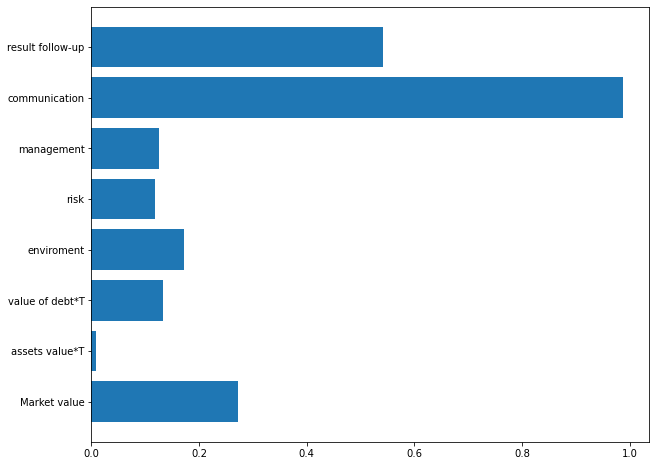

In [151]:
# We're going to visualized the data frame.
fig , ax = plt.subplots(figsize=(10,8))
ax = ax.barh(df_anova["features"],df_anova["p-value"])


from the p-value plot grap, the grap show the relation each feature to target value (good or bad performance)
assets value seem to the imporance feature to our model. because assets values < 0.05.

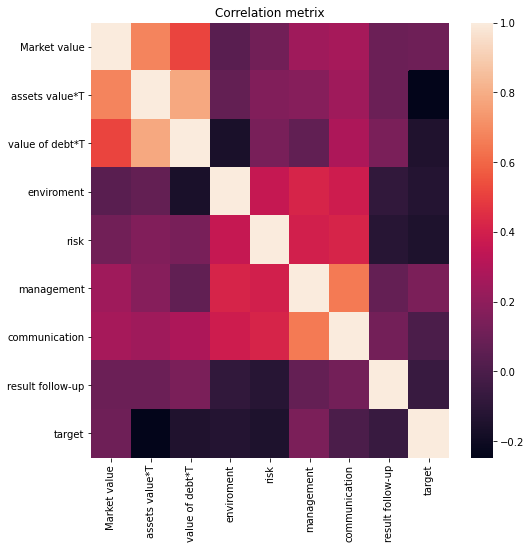

In [153]:
# Check by correlation heatmap 

fig , ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr('pearson'))
ax.set(title="Correlation metrix");

In [154]:
# Bulding a model, the model that we're going to use is RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into train and test part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [155]:
# Checking size

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((91, 8), (91,), (23, 8), (23,))

In [156]:
# setup a model 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [157]:
model.score(X_test, y_test)

0.523689166666667

## Tuning hyperparameter to getting the best accumulation.👌

In this section, we're going to find the best hyperparameter that we could use for producing best output.

We will use GridSearchCV for identify best param. Because our data are't much.

In [158]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4 , 5 , 6 , 7 ,8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 150]
}

# Create based model
rf = RandomForestRegressor()

# create the grid search model
grid_search = GridSearchCV(estimator= rf,
                           param_grid = param_grid,
                           cv=5,
                           n_jobs =-1,
                           verbose= 2)
# Fit the grid search
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   45.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 150]},
             verbose=2)

In [159]:
# Check the best param that GridSearchCV had found
grid_search.best_params_

{'max_depth': 80,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [160]:
model.score(X_test, y_test)

0.523689166666667

In [161]:
# Create the model from best params.
tunned_model = RandomForestRegressor(max_depth = 80, max_features =7, min_samples_leaf=3,min_samples_split=8, n_estimators=100)

In [162]:
# Fitting tunned model
tunned_model.fit(X_train, y_train)

# Scoring the model
tunned_model.score(X_test, y_test)

0.48257571199109894

As you can see, accuracy of tunned model is less then original. So, we're going to use the based model for better performing.

## Usage

In [163]:
X.columns

Index(['Market value', 'assets value*T', 'value of debt*T', 'enviroment',
       'risk', 'management', 'communication', 'result follow-up'],
      dtype='object')

In [186]:
def predict_performance(m_value, a_value, d_value, enviroment , risk , management, communication, result):
    """
    Predict the performance based on given data.
    """
    np.random.seed(42)
    score = model.predict([[m_value, a_value, d_value, enviroment , risk , management, communication, result]])
    value = ""
    if(score < 0.5):
        value = "bad performance"
    elif(score > 0.7 and score < 0.8):
        value = "moderate performance"
    else:
        value = "good performance"
        
    return score[0],value
    

In [185]:
# Test by CPL Stock information in 2015

market_value = 956999818.75
debt_value = 549411.58 * 1000
asset_value = 1543818.08 *1000

predict_performance(market_value, asset_value, debt_value, 7,6,3,4,8)

(0.16, 'bad performance')